
# Regression Learning

- Data preprocessing
- Regression Algorithms

The dataset is about Air Pollution in Skopje - Center - Macedonia

The goal is to predict the PM10 concentration using the weather-meteorological data

The features are explained in Data_Info (some of them are removed)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## 1. Load the Data

In [2]:
# Load the csv:

dataset = pd.read_csv('Centar_cleaned.csv')  

# Visualize the data in a data frame:

dataset

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,0.0,...,0,0,0,0,0,0,1,0,1,1
1,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,0.0,...,0,0,0,0,0,0,1,1,1,1
2,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,0.0,...,0,0,0,0,0,0,1,2,1,1
3,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,0.0,...,0,0,0,0,0,0,1,3,1,1
4,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,0.0,...,0,0,0,0,0,0,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,0.0,...,0,1,0,0,0,0,0,19,31,12
7348,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,0.0,...,0,1,0,0,0,0,0,20,31,12
7349,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,0.0,...,0,1,0,0,0,0,0,21,31,12
7350,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,0.0,...,0,1,0,0,0,0,0,22,31,12


In [3]:
# data statistics:

dataset.describe()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.0,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,72.802447,54.685523,0.419846,42.221562,0.659706,0.000153,0.004354,1018.882155,55.398536,1.009347,...,0.000408,0.322905,0.0,0.046382,0.185528,0.168934,0.275027,11.794070,15.931039,6.318689
std,82.213323,19.914153,0.387737,12.873506,0.207476,0.001423,0.031988,8.375414,19.102358,1.798912,...,0.020198,0.467619,0.0,0.210325,0.388752,0.374719,0.446558,6.754697,8.791142,3.528810
min,0.270000,0.430000,0.000000,-2.210000,0.130000,0.000000,0.000000,986.110000,4.830000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,27.627500,38.522500,0.000000,32.620000,0.510000,0.000000,0.000000,1013.410000,39.400000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.000000,8.000000,3.000000
50%,42.680000,53.390000,0.390000,42.800000,0.690000,0.000000,0.000000,1018.028333,53.390000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,16.000000,6.000000
75%,77.680000,69.650000,0.750000,53.590000,0.830000,0.000000,0.000000,1023.510000,69.610000,1.009347,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,18.000000,23.000000,9.000000
max,815.170000,104.870000,1.000000,69.810000,1.000000,0.033200,0.240000,1041.920000,103.810000,9.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,23.000000,31.000000,12.000000


# 2. Data Preprocessing

Standardize the data. 
Do not standardize the target variable!

In [4]:
# Dataset info:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PM10                 7352 non-null   float64
 1   apparentTemperature  7352 non-null   float64
 2   cloudCover           7352 non-null   float64
 3   dewPoint             7352 non-null   float64
 4   humidity             7352 non-null   float64
 5   precipIntensity      7352 non-null   float64
 6   precipProbability    7352 non-null   float64
 7   pressure             7352 non-null   float64
 8   temperature          7352 non-null   float64
 9   uvIndex              7352 non-null   float64
 10  visibility           7352 non-null   float64
 11  windBearing          7352 non-null   float64
 12  windGust             7352 non-null   float64
 13  windSpeed            7352 non-null   float64
 14  no precip            7352 non-null   int64  
 15  rain                 7352 non-null   i

In [5]:
# Dataset column names:

dataset.columns

Index(['PM10', 'apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'precipIntensity', 'precipProbability', 'pressure', 'temperature',
       'uvIndex', 'visibility', 'windBearing', 'windGust', 'windSpeed',
       'no precip', 'rain', 'sleet', 'snow', 'Clear', 'Drizzle', 'Foggy',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'hour', 'day', 'month'],
      dtype='object')

In [6]:
#dataset.drop(columns = ['precipIntensity', 'precipProbability', 'Drizzle', 'sleet', 'no precip'], inplace = True)

In [7]:
type(dataset)

pandas.core.frame.DataFrame

#### The dataset is not standardized, is used as it is. 

In [8]:
# StandardScaler to standardize the dataset:

#from sklearn.preprocessing import StandardScaler

#columns = ['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'pressure', 'temperature',
#          'uvIndex', 'visibility', 'windBearing', 'windGust', 'windSpeed', 'rain', 'snow', 'Clear', 'Foggy',
#          'Mostly Cloudy', 'Overcast', 'Partly Cloudy']

#transformer = StandardScaler()
#dataset[columns] = transformer.fit_transform(dataset[columns])

In [9]:
# Create X and y... X contains all the features, y contains the target variable (PM10):

X = dataset.drop(['PM10'], axis = 1)
y = pd.DataFrame(dataset.iloc[:,0])

In [10]:
# View of the standardized X:

X.head(5)

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,visibility,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,0.0,6.216,...,0,0,0,0,0,0,1,0,1,1
1,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,0.0,6.216,...,0,0,0,0,0,0,1,1,1,1
2,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,0.0,6.216,...,0,0,0,0,0,0,1,2,1,1
3,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,0.0,6.216,...,0,0,0,0,0,0,1,3,1,1
4,5.62,0.44,2.61,0.60,0.0,0.0,1034.99,14.03,0.0,6.216,...,0,0,0,0,0,0,1,4,1,1


In [11]:
# Confirmation of unstandardized y:

y.head(5)

,PM10
0,30.02
1,30.21
2,29.40
3,28.83
4,27.69


## Correlation Matrix

Plot the Correlation Matrix between all the features and the target variable

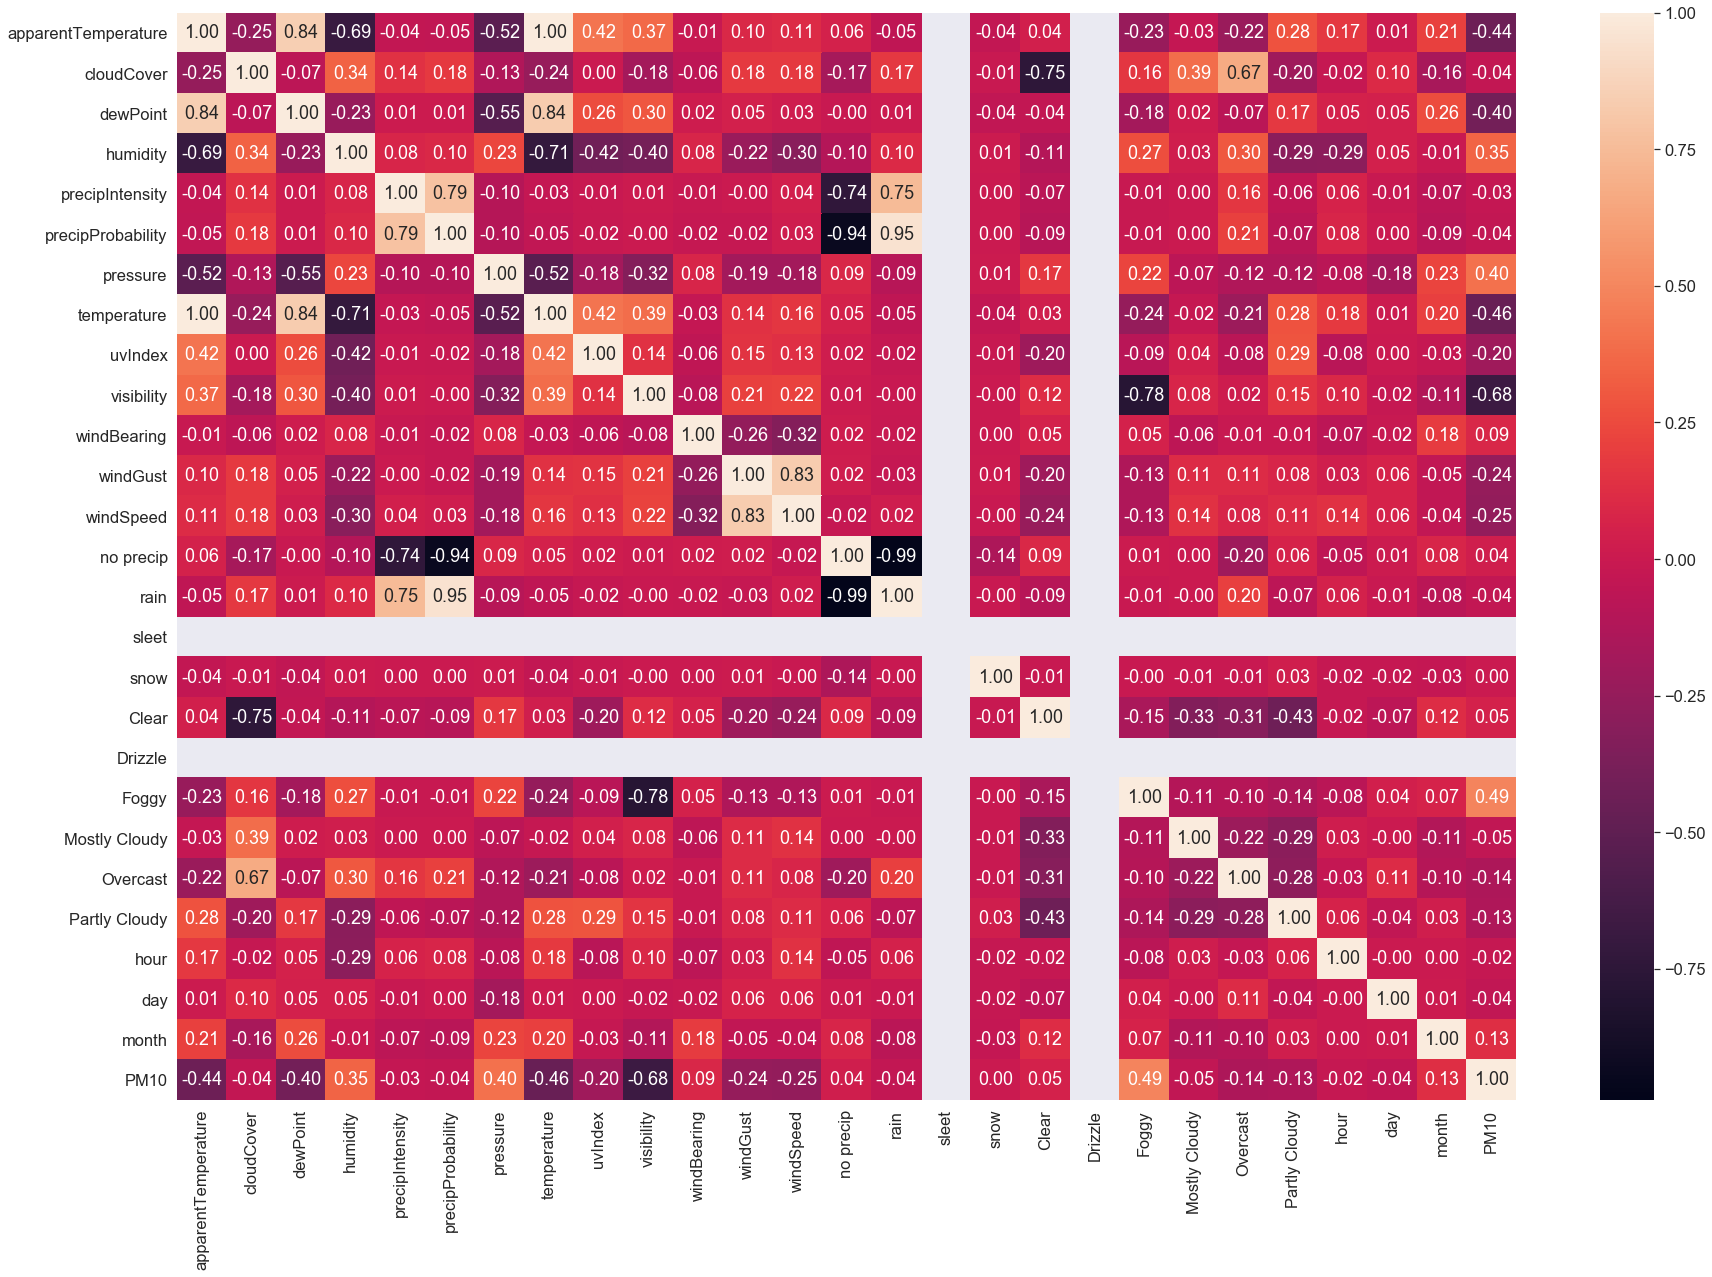

In [12]:
#Correlation Matrix that includes the Target:

result = pd.concat([X, y], axis = 1)
correlation = result.corr()

sns.set(font_scale = 1.5)
plt.figure(figsize = (30, 20))
sns.heatmap(correlation, annot = True, fmt = '.2f')
plt.show()

In [13]:
# Creating dataset_num due to inconvinience with the 'int64' objects:

dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])

dataset_num.head()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,uvIndex,...,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy,hour,day,month
0,30.02,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,0.0,...,0,0,0,0,0,0,1,0,1,1
1,30.21,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,0.0,...,0,0,0,0,0,0,1,1,1,1
2,29.40,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,0.0,...,0,0,0,0,0,0,1,2,1,1
3,28.83,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,0.0,...,0,0,0,0,0,0,1,3,1,1
4,27.69,5.62,0.44,2.61,0.60,0.0,0.0,1034.99,14.03,0.0,...,0,0,0,0,0,0,1,4,1,1


In [14]:
# Listing all the correlated values with PM10 above 0.4:

dataset_num_corr = dataset_num.corr()['PM10'][1:] # 1 because the first row is 'PM10'

important_features = dataset_num_corr[abs(dataset_num_corr) > 0.4].sort_values(ascending = True)

print('There is {} strongly correlated values with PM10:\n{}'.format(len(important_features), important_features))

There is 5 strongly correlated values with PM10:
visibility            -0.675735
temperature           -0.458540
apparentTemperature   -0.436157
pressure               0.403260
Foggy                  0.493524
Name: PM10, dtype: float64


## Split the data 70%-30%

Set the random_state=1

In [15]:
# Spliting the dataset into train and test:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
# X_train shape:

X_train.shape

(5146, 26)

In [17]:
# X_test shape:

X_test.shape

(2206, 26)

In [18]:
# y_train shape:

y_train.shape

(5146, 1)

In [19]:
# y_test shape:

y_test.shape

(2206, 1)

# 3  Regression Learning

## 3.1 Create regressors with default parameters:
- Simple Linear Regression (using only the most correlated feature with the target)
- Linear Regression
- Polynomial with degree 2
- Polynomial with degree 3
- Dummy regressor

#### Simple Linear Regression (using only the most correlated feature with the target)

In [20]:
# Choose one feature - Single Linear model:

X_one = X[['visibility']]

X_one.head(5)

,visibility
0,6.216
1,6.216
2,6.216
3,6.216
4,6.216


In [21]:
# Spliting the one feature dataset into train and test:

X_one_train, X_one_test, y_train, y_test = train_test_split(X_one, y, test_size = 0.3, random_state = 1)

In [22]:
# Importing libraries:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.dummy import DummyRegressor

#### Create regressors with default parameters:

In [23]:
# Simple Linear Regression:

# Create linear regression object:
regr = linear_model.LinearRegression()

# Train the model using the training sets:
regr.fit(X_one_train, y_train)

# Make predictions using the testing set:
y_one_pred = regr.predict(X_one_test)


# Linear Regression:

# Create linear regression object:
regr = linear_model.LinearRegression()

# Train the model using the training sets:
regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred = regr.predict(X_test)


# Polynomial with degree 2:

# create polynomial features transformation with degree 2:
poly = PolynomialFeatures(degree = 2)

# transform the data:
X_poly = poly.fit_transform(X_train)

# train the model:
lin1 = linear_model.LinearRegression()
lin1.fit(X_poly, y_train)

# transform the test data:
X_poly_test = poly.transform(X_test)

# make predictions:
y_pred_poly = lin1.predict(X_poly_test)


# Polynomial with degree 3:
    
# create polynomial features transformation with degree 3:
poly = PolynomialFeatures(degree = 3)

# transform the data:
X_poly2 = poly.fit_transform(X_train)

# train the model:
lin2 = linear_model.LinearRegression()
lin2.fit(X_poly2, y_train)

# transform the test data:
X_poly_test2 = poly.transform(X_test)

# make predictions:
y_pred_poly2 = lin2.predict(X_poly_test2)


# Dummy Regressor:

# Create dummy regression object:
dummy_regr = DummyRegressor(strategy = "mean")

# Train the model using the training sets:
dummy_regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred_dummy = dummy_regr.predict(X_test)

## 3.2  Compare the MAE, MSE, RMSE and R2 values in a table

In [24]:
# Calculating the metrics for all four models:

# Simple Linear Regression:
mae = mean_absolute_error(y_test, y_one_pred)
mse = mean_squared_error(y_test, y_one_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_one_pred))
r2 = r2_score(y_test, y_one_pred)

# Linear Regression:
mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r22 = r2_score(y_test, y_pred)

# Polynomial with degree 2:
mae3 = mean_absolute_error(y_test, y_pred_poly)
mse3 = mean_squared_error(y_test, y_pred_poly)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r23 = r2_score(y_test, y_pred_poly)

# Polynomial with degree 3:
mae4 = mean_absolute_error(y_test, y_pred_poly2)
mse4 = mean_squared_error(y_test, y_pred_poly2)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred_poly2))
r24 = r2_score(y_test, y_pred_poly2)

# Dummy Regressor:
mae5 = mean_absolute_error(y_test, y_pred_dummy)
mse5 = mean_squared_error(y_test, y_pred_dummy)
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r25 = r2_score(y_test, y_pred_dummy)

In [25]:
# Construct the comparison table:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Simple Linear Regression': [mae, mse, rmse, r2],
        'Linear Regression': [mae2, mse2, rmse2, r22],
        'Poly Degree 2': [mae3, mse3, rmse3, r23],
        'Poly Degree 3': [mae4, mse4, rmse4, r24],
        'Dummy Regressor': [mae5, mse5, rmse5, r25],
        }

Comparison = pd.DataFrame (data, columns = ['Metric', 'Simple Linear Regression', 'Linear Regression', 'Poly Degree 2', 'Poly Degree 3', 'Dummy Regressor'])

Comparison

,Metric,Simple Linear Regression,Linear Regression,Poly Degree 2,Poly Degree 3,Dummy Regressor
0,MAE,38.172119,33.670329,29.675057,1.017530e+06,54.804403
1,MSE,3525.498653,2671.199211,3651.968883,2.338286e+14,6532.782034
2,RMSE,59.375910,51.683645,60.431522,1.529146e+07,80.825627
3,R2,0.460297,0.591078,0.440936,-3.579580e+10,-0.000075


## 3.3 Visualize the Predictions/Errors for each regressor

Visualize the errors (actual vs predicted)

[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

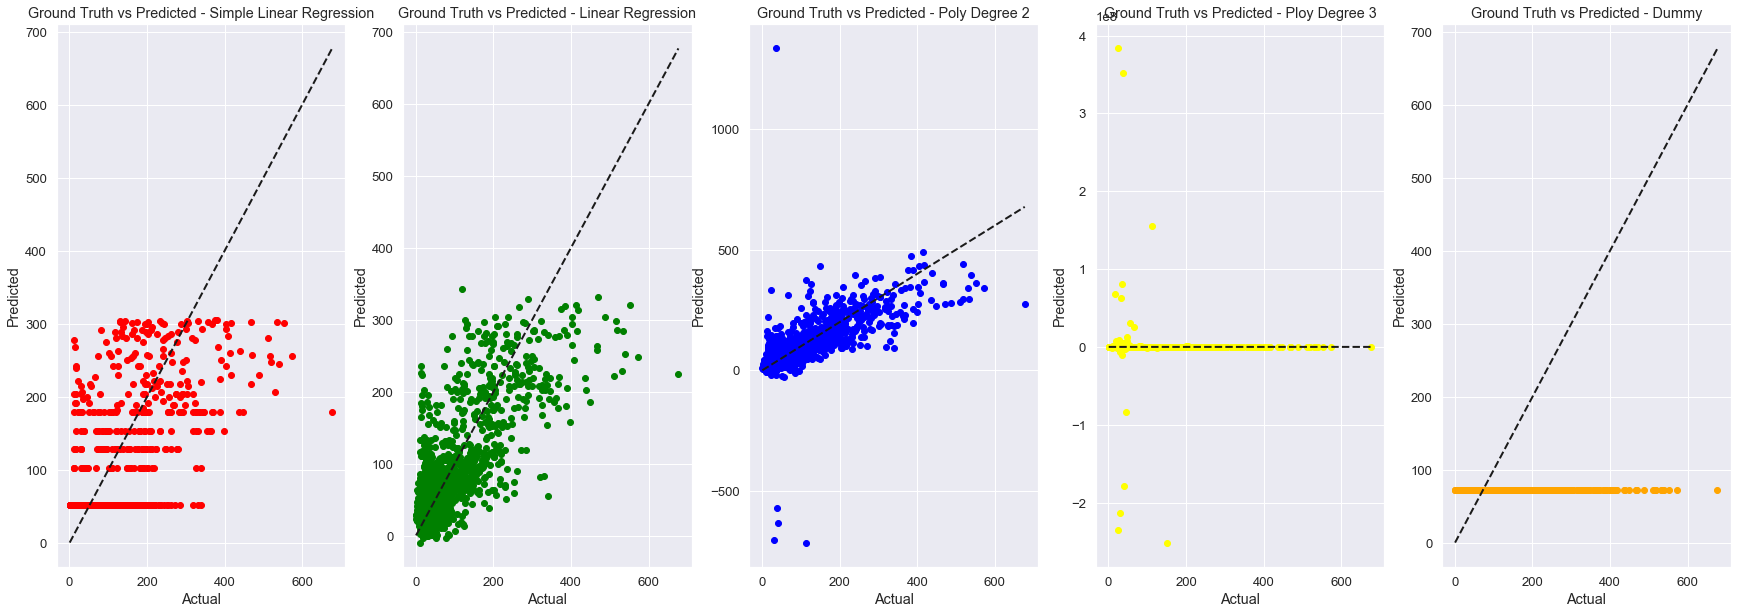

In [26]:
# Visualizing the results:

sns.set(font_scale = 1.2)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (30, 10))

# Simple Linear Regression:
ax1.scatter(y_test, y_one_pred, color = 'red')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - Simple Linear Regression')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# Linear Regression:
ax2.scatter(y_test, y_pred, color = 'green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - Linear Regression')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

# Polynomial with degree 2:
ax3.scatter(y_test, y_pred_poly, color = 'blue')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax3.set_title('Ground Truth vs Predicted - Poly Degree 2')
ax3.set(xlabel = 'Actual', ylabel = 'Predicted')

# Polynomial with degree 3:
ax4.scatter(y_test, y_pred_poly2, color = 'yellow')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax4.set_title('Ground Truth vs Predicted - Ploy Degree 3')
ax4.set(xlabel = 'Actual', ylabel = 'Predicted')

# Dummy Regressor:
ax5.scatter(y_test, y_pred_dummy, color = 'orange')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax5.set_title('Ground Truth vs Predicted - Dummy')
ax5.set(xlabel = 'Actual', ylabel = 'Predicted')

# 4. Evaluation Metrics

For all the comparisons use the following algorithms/regressors:
- Linear Regression
- Dummy regressor

## 4.1 Evaluate the models using 80-20 random split
- Compare the MAE, MSE, RMSE and R2 values in a table 

In [27]:
# Spliting the dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
# Linear Regression:

# Create linear regression object:
regr = linear_model.LinearRegression()

# Train the model using the training sets:
regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred = regr.predict(X_test)


# Dummy Regressor:

# Create dummy regression object:
dummy_regr = DummyRegressor(strategy = "mean")

# Train the model using the training sets:
dummy_regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred_dummy = dummy_regr.predict(X_test)

In [29]:
# Calculating the metrics for all four models:

# Linear Regression:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Dummy Regressor:
mae2 = mean_absolute_error(y_test, y_pred_dummy)
mse2 = mean_squared_error(y_test, y_pred_dummy)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r22 = r2_score(y_test, y_pred_dummy)

In [30]:
# Construct the comparison table:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae, mse, rmse, r2],
        'Dummy Regressor': [mae2, mse2, rmse2, r22],
        }

Comparison = pd.DataFrame (data, columns = ['Metric', 'Linear Regression', 'Dummy Regressor'])

Comparison

,Metric,Linear Regression,Dummy Regressor
0,MAE,33.245847,54.243292
1,MSE,2535.002504,6249.381701
2,RMSE,59.375910,79.053031
3,R2,0.594092,-0.000660


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

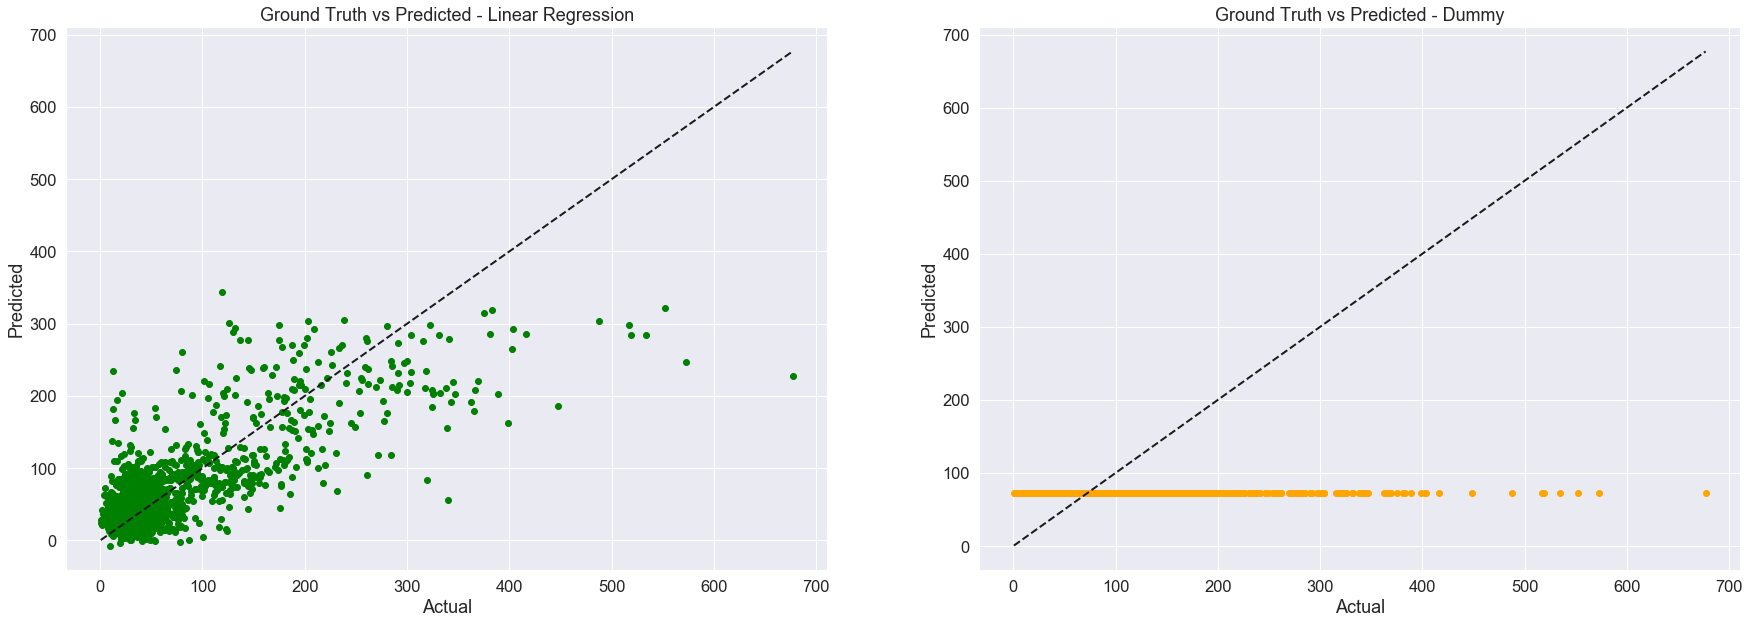

In [31]:
# Visualizing the results:

sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))

# Linear Regression:
ax1.scatter(y_test, y_pred, color = 'green')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - Linear Regression')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# Dummy Regressor:
ax2.scatter(y_test, y_pred_dummy, color = 'orange')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - Dummy')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

## 4.2 Evaluate the models with manual separation
Use the first 6000 samples as train, the rest for test

- Compare the MAE, MSE, RMSE and R2 values in a table

In [32]:
# Spliting the dataset:

X_train = X[:6000]
X_test = X[6000:]

y_train = y[:6000]
y_test = y[6000:]

In [33]:
# Linear Regression:

# Create linear regression object:
regr = linear_model.LinearRegression()

# Train the model using the training sets:
regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred = regr.predict(X_test)


# Dummy Regressor:

# Create dummy regression object:
dummy_regr = DummyRegressor(strategy = "mean")

# Train the model using the training sets:
dummy_regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred_dummy = dummy_regr.predict(X_test)

In [34]:
# Calculating the metrics for all four models:

# Linear Regression:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Dummy Regressor:
mae2 = mean_absolute_error(y_test, y_pred_dummy)
mse2 = mean_squared_error(y_test, y_pred_dummy)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r22 = r2_score(y_test, y_pred_dummy)

In [35]:
# Construct the comparison table:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae, mse, rmse, r2],
        'Dummy Regressor': [mae2, mse2, rmse2, r22],
        }

Comparison = pd.DataFrame (data, columns = ['Metric', 'Linear Regression', 'Dummy Regressor'])

Comparison

,Metric,Linear Regression,Dummy Regressor
0,MAE,70.342568,101.919565
1,MSE,8941.063834,19422.321727
2,RMSE,59.375910,139.363990
3,R2,0.188367,-0.763078


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

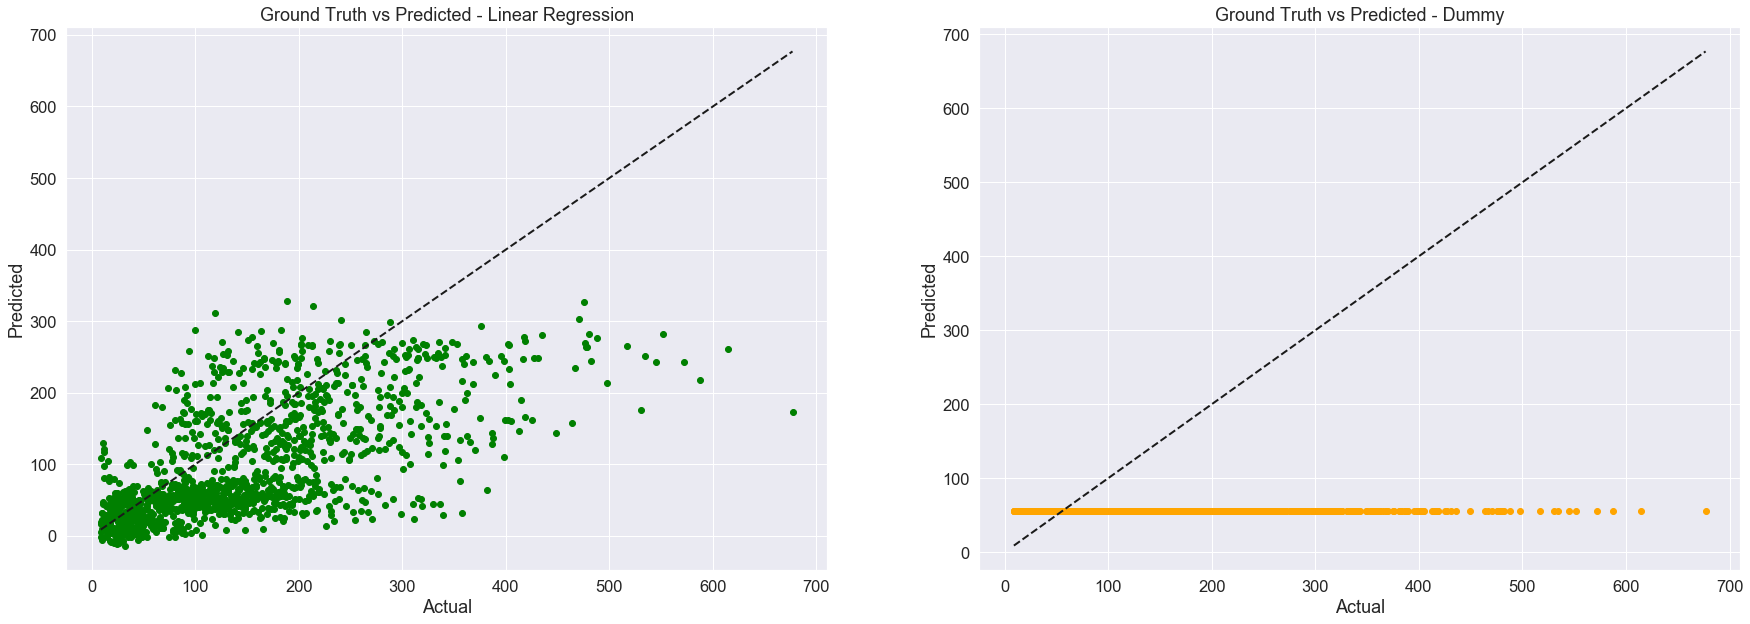

In [36]:
# Visualizing the results:

sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))

# Linear Regression:
ax1.scatter(y_test, y_pred, color = 'green')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - Linear Regression')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# Dummy Regressor:
ax2.scatter(y_test, y_pred_dummy, color = 'orange')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - Dummy')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

## 4.3 Evaluate the models using 80-20 random split - STRATIFIED
Compare the MAE, MSE, RMSE and R2 values in a table

In [37]:
# Spliting the dataset:

bins = np.linspace(0, 350, 70)
bins = bins.astype(int)

# Save your y values in a new ndarray, broken down by the bins created above:

y_binned = np.digitize(y, bins)

# Pass y_binned to the stratify argument, and sklearn will handle the rest:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y_binned)

(array([273., 924., 416., 133.,  95.,  79.,  55.,  51.,  45.,  25.,  20.,
         19.,  16.,  55.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
        131, 136, 142, 147, 152, 157, 162, 167, 172, 177, 182, 187, 192,
        197, 202, 207, 213, 218, 223, 228, 233, 238, 243, 248, 253, 258,
        263, 268, 273, 278, 284, 289, 294, 299, 304, 309, 314, 319, 324,
        329, 334, 339, 344, 350]),
 <a list of 69 Patch objects>)

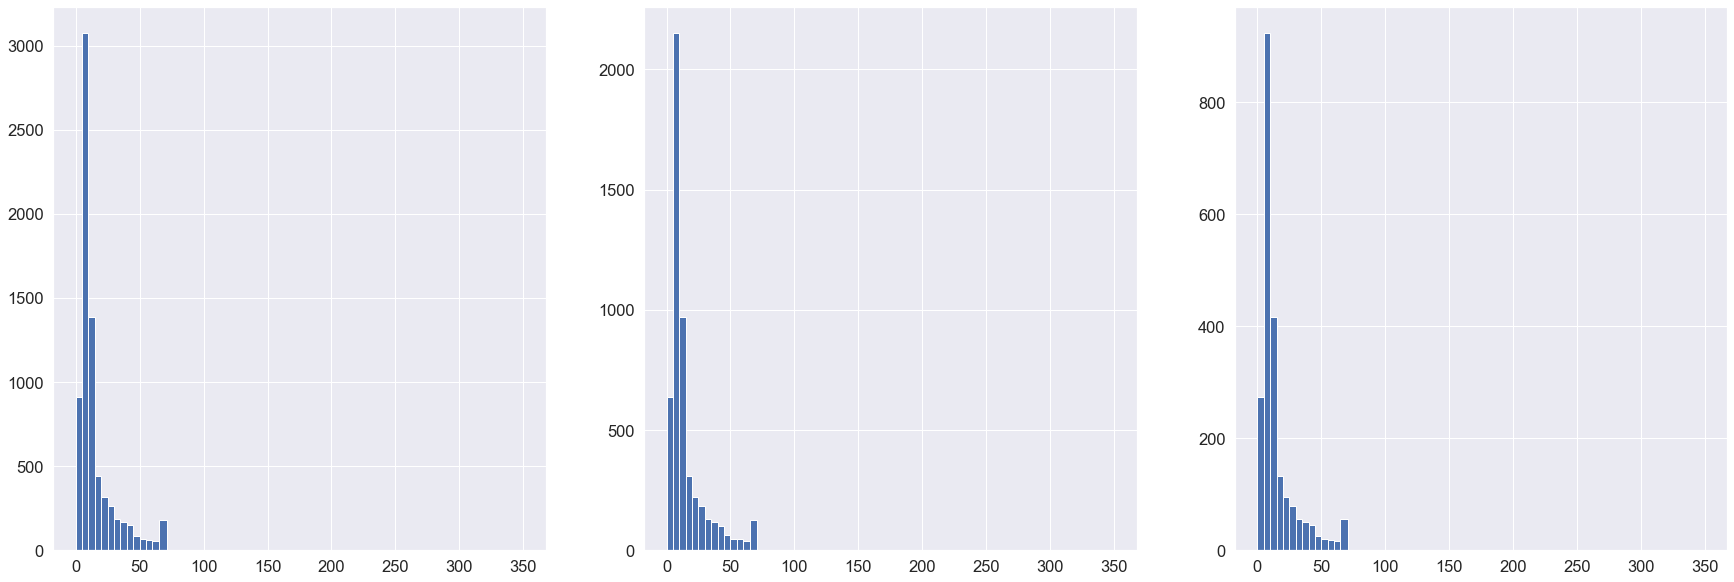

In [38]:
# Visualizing the y sets:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))

ax1.hist(y_binned, bins)

y_train_binned = np.digitize(y_train, bins)
ax2.hist(y_train_binned, bins)

y_test_binned = np.digitize(y_test, bins)
ax3.hist(y_test_binned, bins)

In [39]:
# Linear Regression:

# Create linear regression object:
regr = linear_model.LinearRegression()

# Train the model using the training sets:
regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred = regr.predict(X_test)


# Dummy Regressor:

# Create dummy regression object:
dummy_regr = DummyRegressor(strategy = "mean")

# Train the model using the training sets:
dummy_regr.fit(X_train, y_train)

# Make predictions using the testing set:
y_pred_dummy = dummy_regr.predict(X_test)

In [40]:
# Calculating the metrics for all four models:

# Linear Regression:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Dummy Regressor:
mae2 = mean_absolute_error(y_test, y_pred_dummy)
mse2 = mean_squared_error(y_test, y_pred_dummy)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r22 = r2_score(y_test, y_pred_dummy)

In [41]:
# Construct the comparison table:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae, mse, rmse, r2],
        'Dummy Regressor': [mae2, mse2, rmse2, r22],
        }

Comparison = pd.DataFrame (data, columns = ['Metric', 'Linear Regression', 'Dummy Regressor'])

Comparison

,Metric,Linear Regression,Dummy Regressor
0,MAE,34.328534,54.850856
1,MSE,3018.282128,6746.523580
2,RMSE,59.375910,82.137224
3,R2,0.552613,-0.000008


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

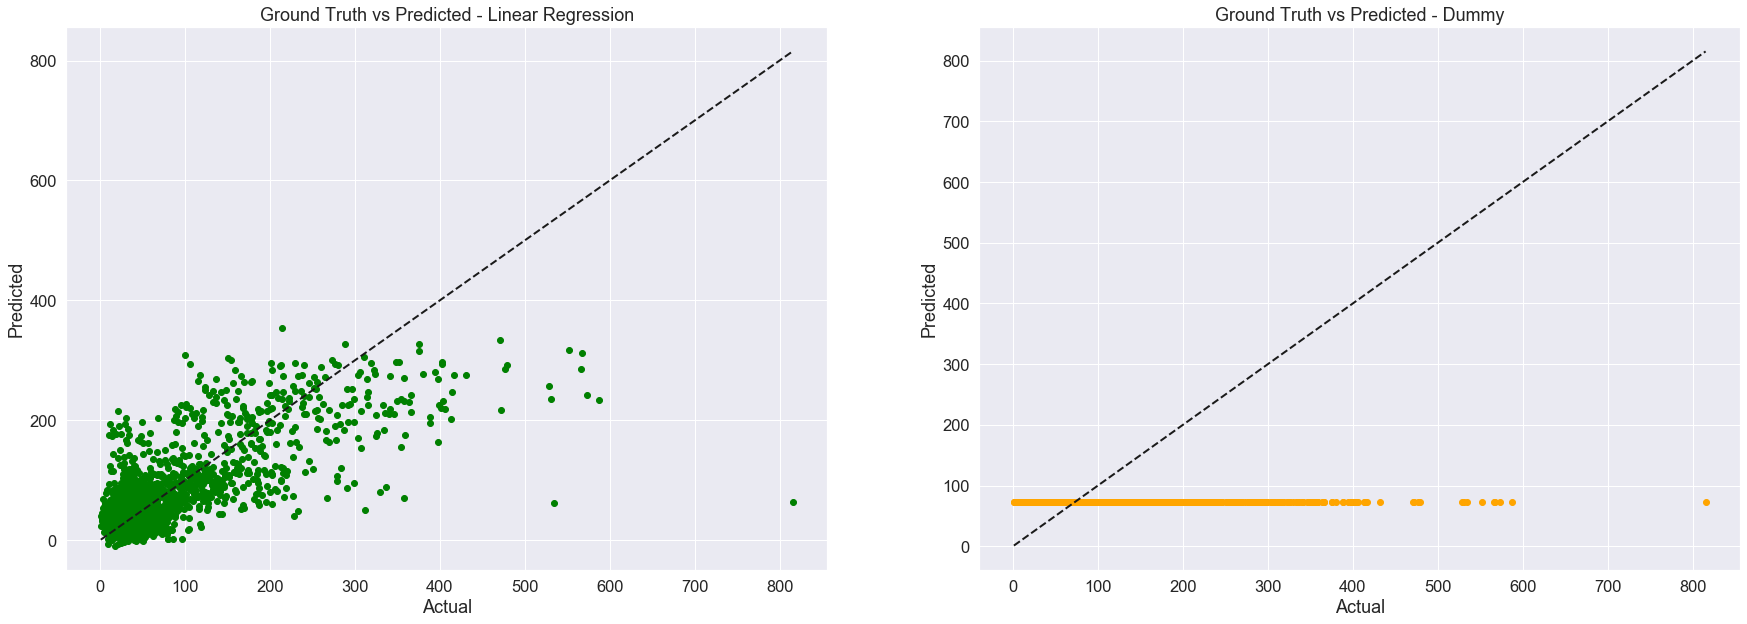

In [42]:
# Visualizing the results:

sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))

# Linear Regression:
ax1.scatter(y_test, y_pred, color = 'green')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - Linear Regression')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# Dummy Regressor:
ax2.scatter(y_test, y_pred_dummy, color = 'orange')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - Dummy')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

## 4.4 Evaluate the models using 10 fold cross validation
Compare the MAE, MSE, RMSE and R2 values in a table

In [43]:
# Spliting the dataset, 10-fold Cross validaiton:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

kf = KFold(n_splits = 10, shuffle = True)
np.random.seed(seed = 1)
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

In [44]:
# Linear Regression:

# Create linear regression object:
lin = linear_model.LinearRegression()

# Train the model using the training sets:
scores1 = cross_validate(lin, X, y, cv = kf, scoring = scoring)

# Make predictions using the testing set:
y_pred = cross_val_predict(lin, X, y, cv = kf)


#Dummy Regressor:

# Create dummy regression object:
dummy_regr = DummyRegressor(strategy = "mean")

# Train the model using the training sets:
scores2 = cross_validate(dummy_regr, X, y, cv = kf, scoring = scoring)

# Make predictions using the testing set:
y_pred_dummy = cross_val_predict(dummy_regr, X, y, cv = kf)

In [45]:
# Calculating the metrics for all four models:

# Linear Regression:
mae = np.mean(scores1['test_neg_mean_absolute_error'] * (-1))
mse = np.mean(scores1['test_neg_mean_squared_error'] * (-1))
rmse = np.mean(scores1['test_neg_root_mean_squared_error'] * (-1))
r2 = np.mean(scores1['test_r2'])

# Dummy Regressor:
mae2 = np.mean(scores2['test_neg_mean_absolute_error'] * (-1))
mse2 = np.mean(scores2['test_neg_mean_squared_error'] * (-1))
rmse2 = np.mean(scores2['test_neg_root_mean_squared_error'] * (-1))
r22 = np.mean(scores2['test_r2'])

In [46]:
# Construct the comparison table:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae, mse, rmse, r2],
        'Dummy Regressor': [mae2, mse2, rmse2, r22],
        }

Comparison = pd.DataFrame (data, columns = ['Metric', 'Linear Regression', 'Dummy Regressor'])

Comparison

,Metric,Linear Regression,Dummy Regressor
0,MAE,34.127173,54.965939
1,MSE,2891.165628,6759.928129
2,RMSE,53.587850,82.138979
3,R2,0.570756,-0.001459


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

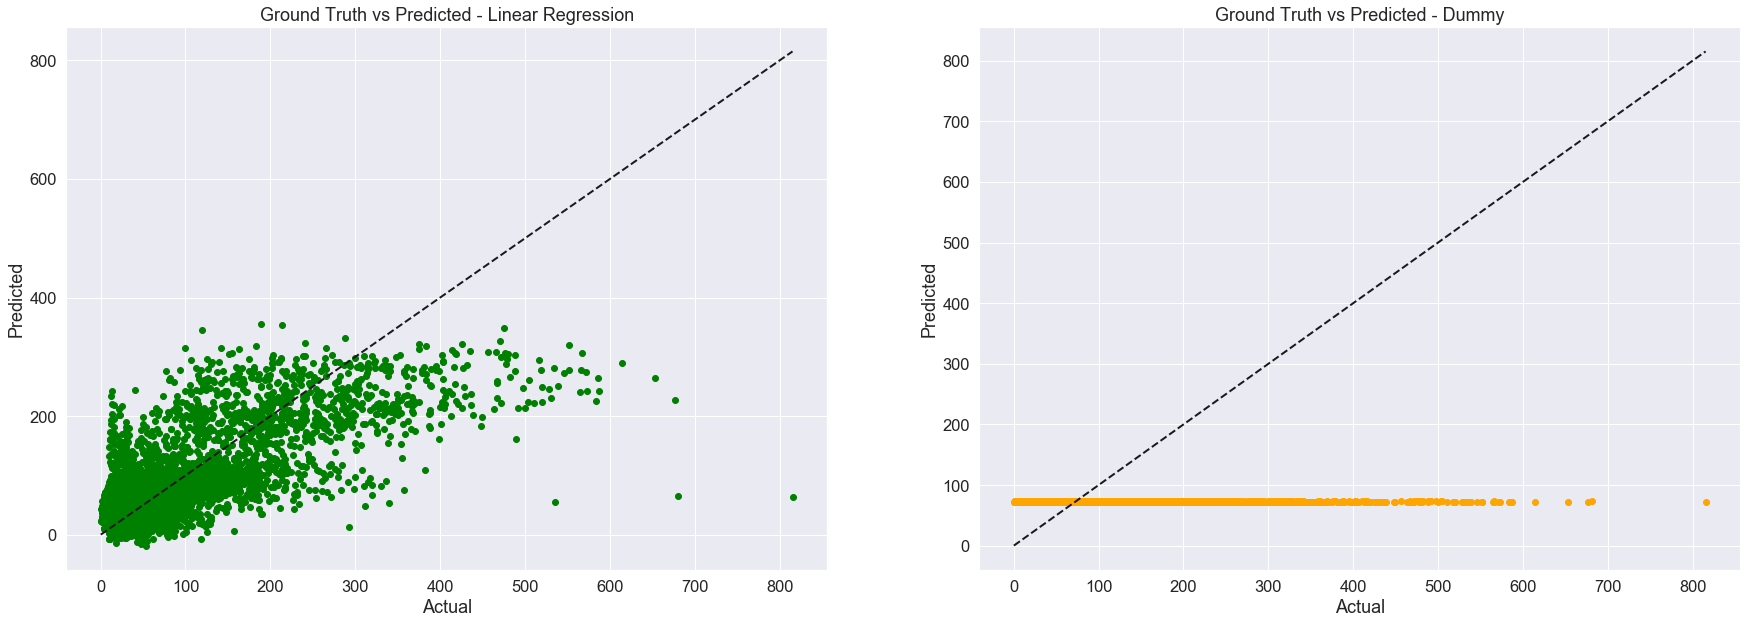

In [47]:
# Visualizing the results:

y_test = y
sns.set(font_scale = 1.5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))

# Linear Regression:
ax1.scatter(y_test, y_pred, color = 'green')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - Linear Regression')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# Dummy Regressor:
ax2.scatter(y_test, y_pred_dummy, color = 'orange')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - Dummy')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

In [48]:
#pd.qcut(df['ext price'], q=4)
# https://pbpython.com/pandas-qcut-cut.html
#bins = np.linspace(0, 350, 70)
#bins = bins.astype(int)